# Lab 3.7 - Visualization (Univariate Methods)

## Load and inspect dataset

In [153]:
# dataset https://archive.ics.uci.edu/ml/datasets/auto+mpg

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = sns.load_dataset("mpg")

In [154]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

## Histogram

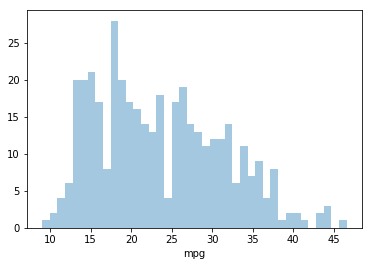

In [4]:
# Histogram
sns.distplot(df.mpg, bins=40, kde=False)

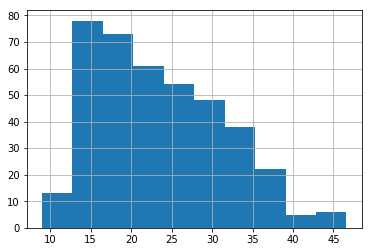

In [5]:
df.mpg.hist()
plt.show()

## Density Plot

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


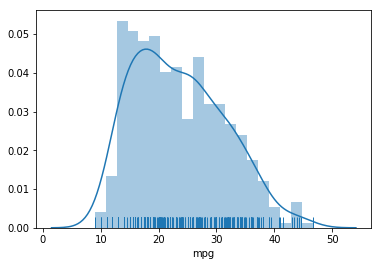

In [6]:
# Density plot with rug
sns.distplot(df.mpg, bins=20, kde=True, rug=True)

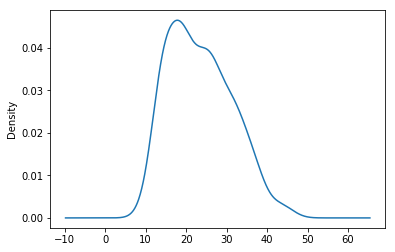

In [7]:
df.mpg.plot.density()
plt.show()

## Boxplot

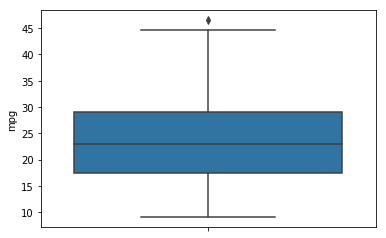

In [8]:
sns.boxplot(y=df.mpg)

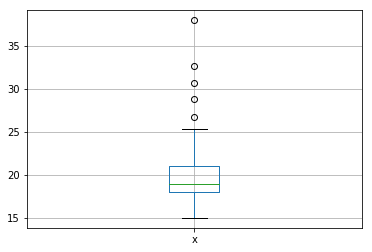

In [9]:
pd.DataFrame.boxplot(df[df.cylinders==6].mpg)
plt.show()

## Visualizing Multivariate Data With Univariate Methods

### Histogram-Grid (one histogram per column)

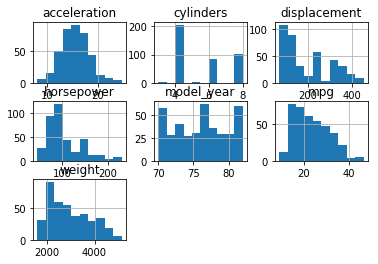

In [10]:
df.hist()
plt.show()

### Histogram/density/rug plot grid (one plot per column)

  column  value
0    mpg   18.0
1    mpg   15.0
2    mpg   18.0
3    mpg   16.0
4    mpg   17.0


C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


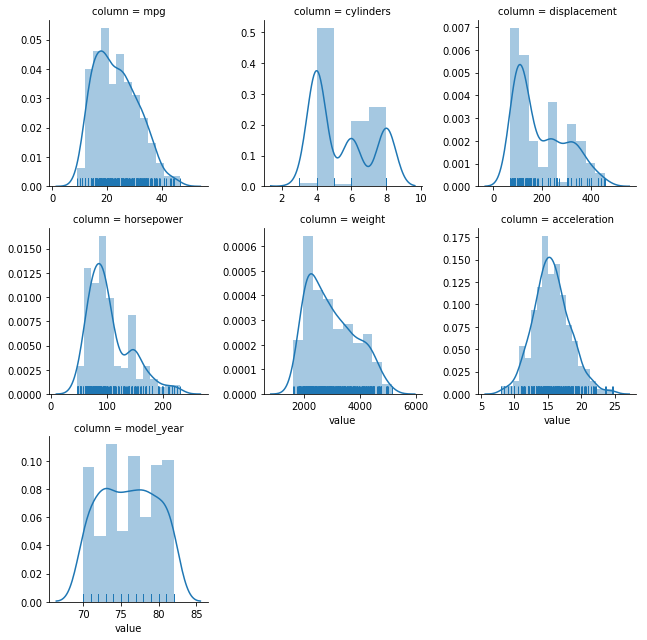

In [102]:
# Please note: the FacetGrid approach presented here is usually used to group data in a dataframe
# and create visualizations per group --> we are now going to perform a "workaroud" to group
# our data by each (numeric) column in the dataframe

# first, we should have a reference to only the numeric columns
df_num = df._get_numeric_data()

# second, we need a "flattened" version of our dataframe
dfm_num = df_num.melt(var_name='column')

# original dataframe:
# mpg | weight | cylinders
# -------------------------
# 20  | 3000   | 6
# 18  | 2800   | 8
# ... | ...    | ...

# dataframe after melt:
# column    | value
# --------------------
# mpg       | 20
# mpg       | 18
# mpg       | ...
# weight    | 3000
# weight    | 2800
# weight    | ...
# cylinders | 6
# cylinders | 8
# cylinders | ...

print(dfm_num.head())

# we create a FacetGrid that allows us to combine multiple graphs / views on one dataset
# see: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# we provde the dataset and the column for which seaborn will create one graph per
# unique value (sharex and sharey avoid that all graphs use the same axis scaling)
g = sns.FacetGrid(dfm_num, col='column', col_wrap=3, sharex=False, sharey=False)

# the arguments kde and rug are passed to the distplot call
# the positional argument 'value' is the name of the column that contains data
# this is automatically created by "melt" (see print below)
g = (g.map(sns.distplot, 'value', kde=True, rug=True))
plt.show()


### Univariate Boxplot for multivariate data (one boxplot per column)

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


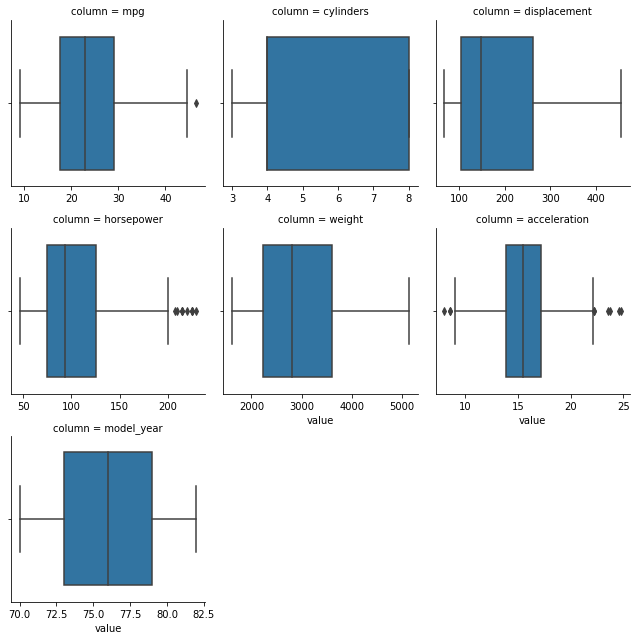

In [105]:
# we create a FacetGrid that allows us to combine multiple graphs / views on one dataset
# we again rely on the melted dataframe
g = sns.FacetGrid(dfm_num, col='column', col_wrap=3, sharex=False, sharey=False)

# having prepared the data, using a boxplot is now very simple: replace the plotting function
# and remove the keyword-arguments kde&rug that are not knwon by boxplot
g = (g.map(sns.boxplot, 'value'))
plt.show()

## Visualizing Grouped Data With Univariate Methods

### Histogram on grouped data

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


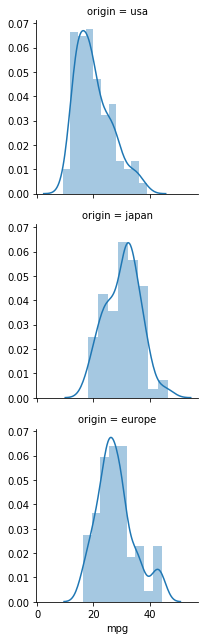

In [176]:
g = sns.FacetGrid(df, col='origin', col_wrap=1, sharex=True, sharey=True)
g.map(sns.distplot, 'mpg')
plt.show()

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


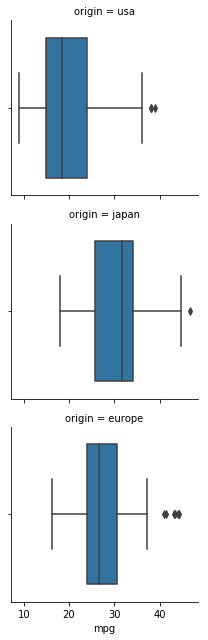

In [180]:
g = sns.FacetGrid(df, col='origin', col_wrap=1, sharex=True, sharey=True)
g.map(sns.boxplot, 'mpg')
plt.show()

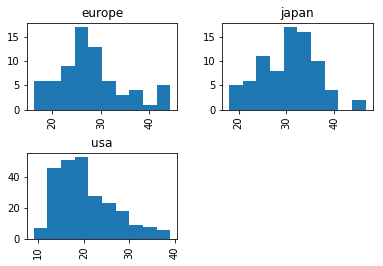

In [191]:
# using the simple hist-method of pandas
df[['mpg', 'origin']].hist(by='origin')
plt.show()


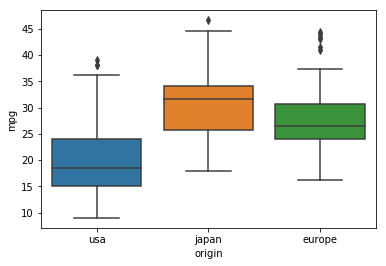

In [181]:
sns.boxplot(x=df.origin, y=df.mpg)
plt.show()

In [ ]:
sns.boxplot(x=df.cylinders, y=df.mpg)
plt.show()

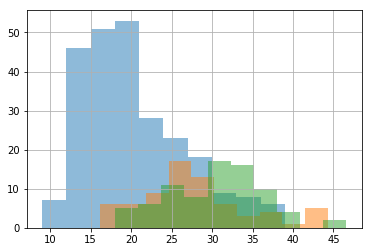

In [206]:
df[df.origin=='usa'].mpg.hist(alpha=0.5)
df[df.origin=='europe'].mpg.hist(alpha=0.5)
df[df.origin=='japan'].mpg.hist(alpha=0.5)
plt.show()

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


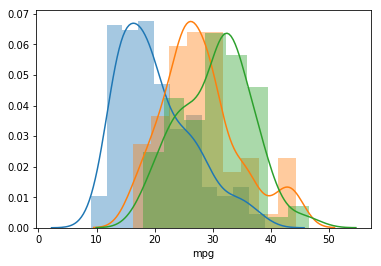

In [208]:
sns.distplot(df[df.origin=='usa'].mpg)
sns.distplot(df[df.origin=='europe'].mpg)
sns.distplot(df[df.origin=='japan'].mpg)
plt.show()

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


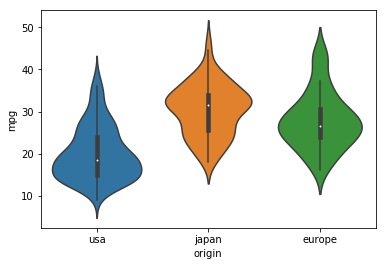

In [203]:
sns.violinplot(x='origin', y='mpg', data=df)
plt.show()

## Interpretation of Univariate Visualizations

### Outlier Detection

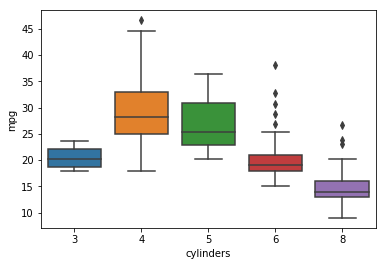

In [192]:
sns.boxplot(x=df.cylinders, y=df.mpg)
plt.show()

In [194]:
# find outlier values for 6-cylinder cars
df_6cyl = df[df.cylinders==6]
q75 = df_6cyl.mpg.quantile(0.75)
q25 = df_6cyl.mpg.quantile(0.25)
iqr = q75 - q25
max_value = df_6cyl.mpg.max()
theoretical_upper_whisker = min(q75 + 1.5 * iqr, max_value)
theoretical_upper_whisker
df_6cyl[df_6cyl.mpg>theoretical_upper_whisker]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
306,28.8,6,173.0,115.0,2595,11.3,79,usa,chevrolet citation
307,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
306,28.8,6,173.0,115.0,2595,11.3,79,usa,chevrolet citation
307,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


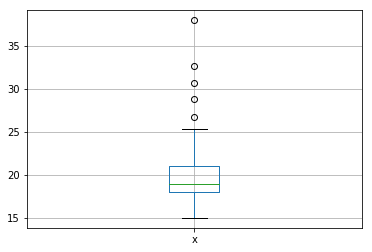

In [202]:
# there is a faster way when you use DataFrame boxplot directly
_, bp = pd.DataFrame.boxplot(df_6cyl.mpg, return_type='both')  # return plot and parameters
outliers = [flier.get_ydata() for flier in bp["fliers"]]
df_6cyl[df_6cyl['mpg'].isin(list(outliers[0]))]

### Comparison to Normal Distribution

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


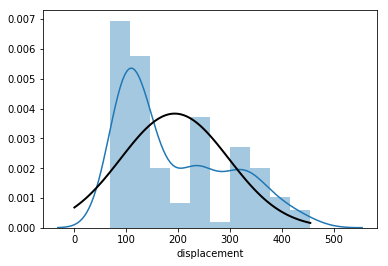

In [132]:
# Example: avoid wrong fitting to normal distribution

column = 'displacement'

sns.distplot(df[column])

# fit a normal distribution to the data
from scipy.stats import norm
import numpy as np
mu, std = norm.fit(df[column])

x = np.linspace(0, df[column].max(), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


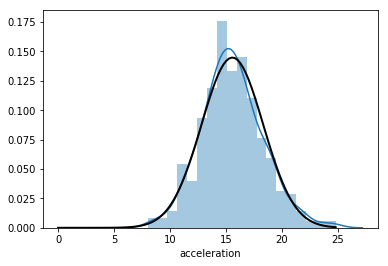

In [133]:
column = 'acceleration'

sns.distplot(df[column])

# fit a normal distribution to the data
from scipy.stats import norm
import numpy as np
mu, std = norm.fit(df[column])


x = np.linspace(0, df[column].max(), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [150]:
# this cell is only for explanation purposes - not covered yet!

# our visual results are also visible in a hypothesis test (hypthesis: x comes from a normal distribution)
from scipy.stats import normaltest
column = 'displacement'

alpha = 1e-3  # 1 - 99.9
k2, p = normaltest(df[column])

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected --> {} not normally distributed with alpha {}".format(column, alpha))
else:
    print("The null hypothesis cannot be rejected --> {} normally distributed with alpha {}".format(column, alpha))

The null hypothesis can be rejected --> displacement not normally distributed with alpha 0.001
